In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



from statsmodels.tsa.stattools import adfuller

In [2]:
pd.set_option('display.max_columns',None)

In [146]:
data =  pd.read_csv('TATAMOTORS.NS.csv', parse_dates=['Date'], index_col= 'Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0


In [4]:
data.isnull().sum()


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
data.dropna(inplace = True , axis = 0)

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2359 non-null   float64
 1   High       2359 non-null   float64
 2   Low        2359 non-null   float64
 3   Close      2359 non-null   float64
 4   Adj Close  2359 non-null   float64
 5   Volume     2359 non-null   float64
dtypes: float64(6)
memory usage: 129.0 KB


In [8]:
import statsmodels.api as sm

for i in data.columns:
    print('{} durbin watsen test = {}'.format(i ,  sm.stats.durbin_watson(data[i])))

Open durbin watsen test = 0.0004248381601064135
High durbin watsen test = 0.0003633494688975887
Low durbin watsen test = 0.00042839832296449984
Close durbin watsen test = 0.0004477992393896222
Adj Close durbin watsen test = 0.0004475090896583436
Volume durbin watsen test = 0.2703755678323773


<Axes: xlabel='Date'>

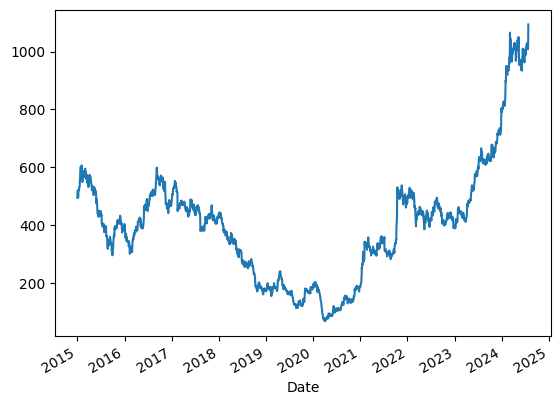

In [9]:
data['High'].plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_additive = seasonal_decompose(data['High'] , period = 12 , model = 'additive' )
seasonal_multiplicative = seasonal_decompose(data['High'] , period = 12 , model = 'multiplicative' )


# checking trend, seasonality 

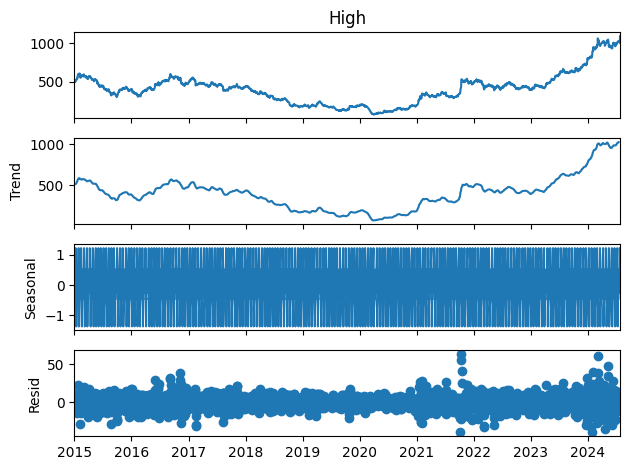

In [11]:
seasonal_additive.plot()
plt.show()

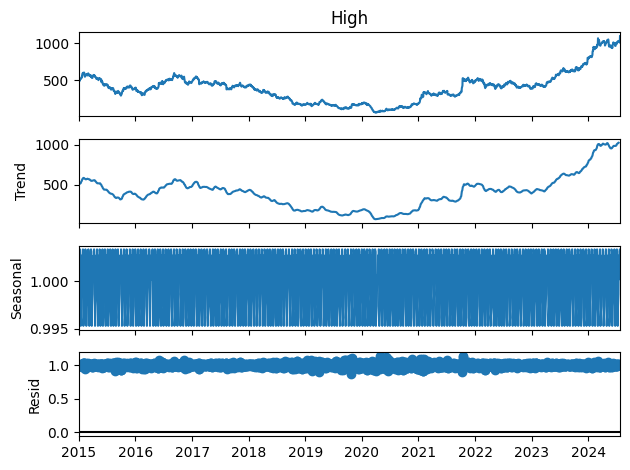

In [12]:
seasonal_multiplicative.plot()
plt.show()

# Train and Test Spliting finding the p,d,q values

In [13]:
train = data[data.index.year <= 2022]
test =  data[data.index.year > 2022]
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,392.500000,396.000000,391.000000,394.799988,392.362549,10501357.0
2023-01-03,396.000000,398.350006,393.000000,393.899994,391.468079,9431220.0
2023-01-04,394.799988,394.799988,385.000000,385.600006,383.219360,16121049.0
2023-01-05,387.899994,388.750000,382.500000,386.899994,384.511322,10443908.0
2023-01-06,386.100006,388.399994,381.000000,382.000000,379.641571,8715469.0
...,...,...,...,...,...,...
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0


In [14]:

# !pip install pmdarima


from pmdarima import auto_arima

# Fit auto_arima to automatically find the best (p, d, q)
stepwise_model = auto_arima(train['High'], start_p=0, start_q=0,
                            max_p=5, max_q=5, seasonal=False,
                            d=None, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Best model summary
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13718.260, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13675.757, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13671.707, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13716.347, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13671.026, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13671.734, Time=1.93 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13670.529, Time=3.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13671.604, Time=0.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13672.187, Time=3.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13672.171, Time=3.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13673.236, Time=1.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13673.844, Time=4.82 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13668.593, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13669.671, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0

# Checking Train and Test Sationary

In [15]:
# ADF Test on training data
train_series = train['High']
result_train = adfuller(train_series)

print('ADF Statistic for training data:', result_train[0])
print('p-value for training data:', result_train[1])


ADF Statistic for training data: -2.13727258476155
p-value for training data: 0.22979353177381395


In [16]:
train['1stdiff'] = train.Open- train.Open.shift(1)


In [17]:
# ADF Test on testing data
test_series = test['High']
result_test = adfuller(test_series)

print('ADF Statistic for testing data:', result_test[0])
print('p-value for testing data:', result_test[1])


ADF Statistic for testing data: 0.1825064487093987
p-value for testing data: 0.9712631885766313


In [18]:
# Differencing training data (d=1)
train_diff = train_series.diff().dropna()

# Differencing testing data (d=1)
test_diff = test_series.diff().dropna()

# Re-run ADF test on differenced data
result_train_diff = adfuller(train_diff)
result_test_diff = adfuller(test_diff)

print('p-value after differencing (train):', result_train_diff[1])
print('p-value after differencing (test):', result_test_diff[1])


p-value after differencing (train): 2.0785264272441015e-30
p-value after differencing (test): 1.225114998333662e-12


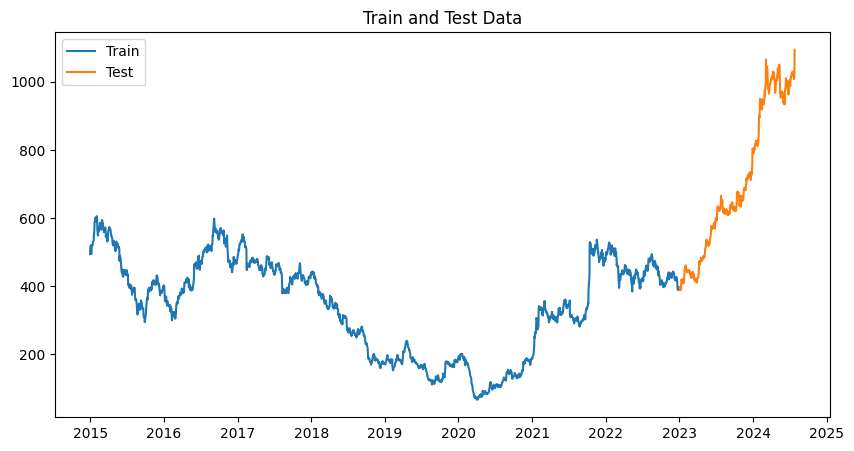

In [19]:
import matplotlib.pyplot as plt

# Plot training and testing data
plt.figure(figsize=(10,5))
plt.plot(train.index, train['High'], label='Train')
plt.plot(test.index, test['High'], label='Test')
plt.title('Train and Test Data')
plt.legend()
plt.show()


# Checking P, Q values

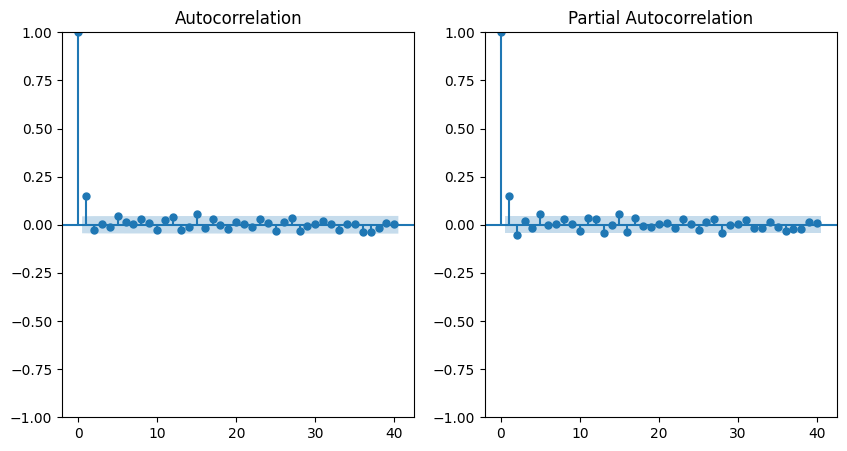

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(10,5))

plt.subplot(121)
plot_acf(train_diff, lags=40, ax=plt.gca())  # ACF Plot (to find q)

plt.subplot(122)
plot_pacf(train_diff, lags=40, ax=plt.gca())  # PACF Plot (to find p)

plt.show()


# Checking Seanolity 

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(train['High'], model='additive', period=12)
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

In [45]:
adfuller(trend.dropna())

(-2.014857424260445,
 0.28009687152934415,
 26,
 1937,
 {'1%': -3.4337304786522114,
  '5%': -2.8630332867971835,
  '10%': -2.5675649665362372},
 1773.0642921541576)

# Model Building

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


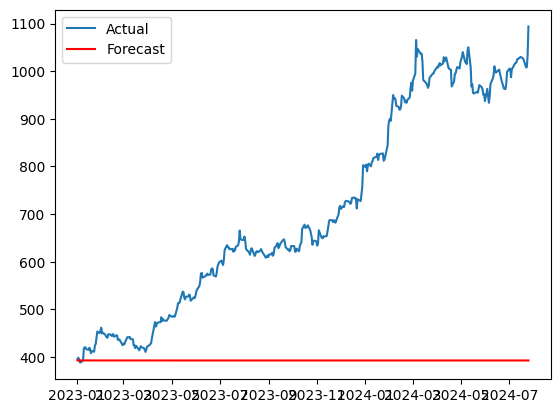

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on differenced training data
model = ARIMA(train['High'], order=(1,1,2))  #(p, d, q)
model_fit = model.fit()

# Forecast on the test data
forecast = model_fit.forecast(steps=len(test))

# Evaluate and plot the forecast
plt.plot(test.index, test['High'], label='Actual')
plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.legend()
plt.show()


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1976
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6830.296
Date:                Tue, 17 Sep 2024   AIC                          13668.593
Time:                        09:59:38   BIC                          13690.946
Sample:                             0   HQIC                         13676.806
                               - 1976                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8995      0.069    -13.103      0.000      -1.034      -0.765
ma.L1          1.0613      0.071     15.025      0.000       0.923       1.200
ma.L2          0.1264      0.025      5.091      0.000       0.078       0.175
sigma2        59.0778      0.758     77.948      0.000      57.592      60.563
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12741.07
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.69
Prob(H) (two-sided):                  0.65   Kurtosis:                        15.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,392.500000,396.000000,391.000000,394.799988,392.362549,10501357.0
2023-01-03,396.000000,398.350006,393.000000,393.899994,391.468079,9431220.0
2023-01-04,394.799988,394.799988,385.000000,385.600006,383.219360,16121049.0
2023-01-05,387.899994,388.750000,382.500000,386.899994,384.511322,10443908.0
2023-01-06,386.100006,388.399994,381.000000,382.000000,379.641571,8715469.0
...,...,...,...,...,...,...
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0


In [24]:
forecast

1976    392.670652
1977    392.620317
1978    392.665595
1979    392.624866
1980    392.661503
           ...    
2354    392.644153
2355    392.644153
2356    392.644153
2357    392.644153
2358    392.644153
Name: predicted_mean, Length: 383, dtype: float64

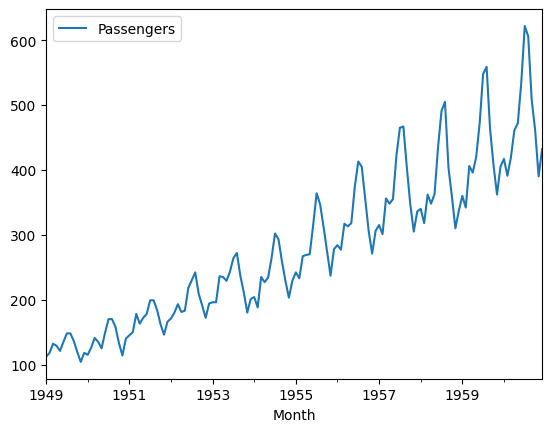

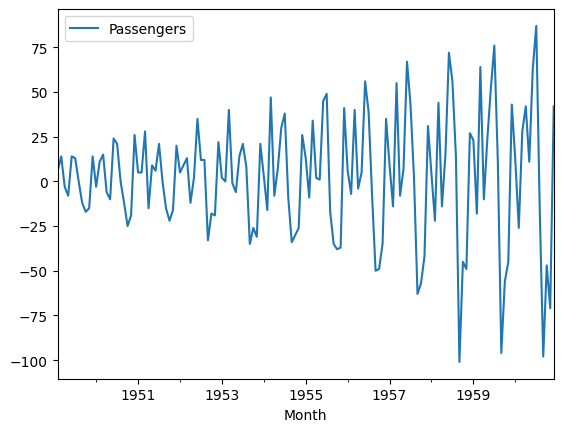

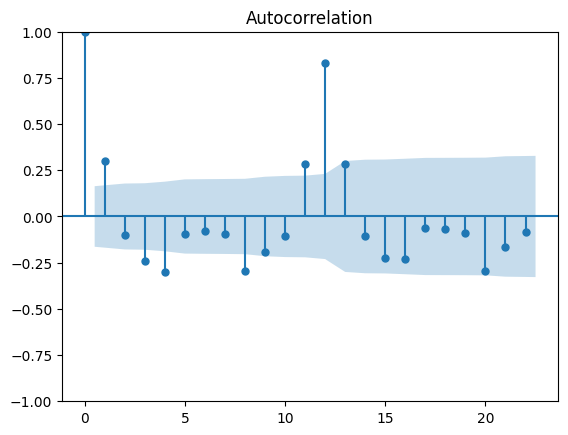

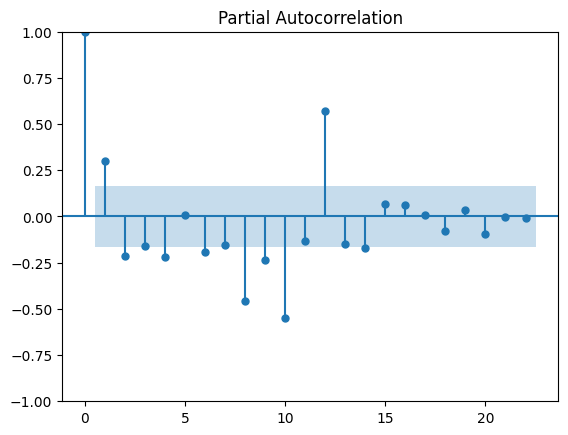

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 17 Sep 2024   AIC                           1353.347
Time:                        09:59:48   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.819      0.0

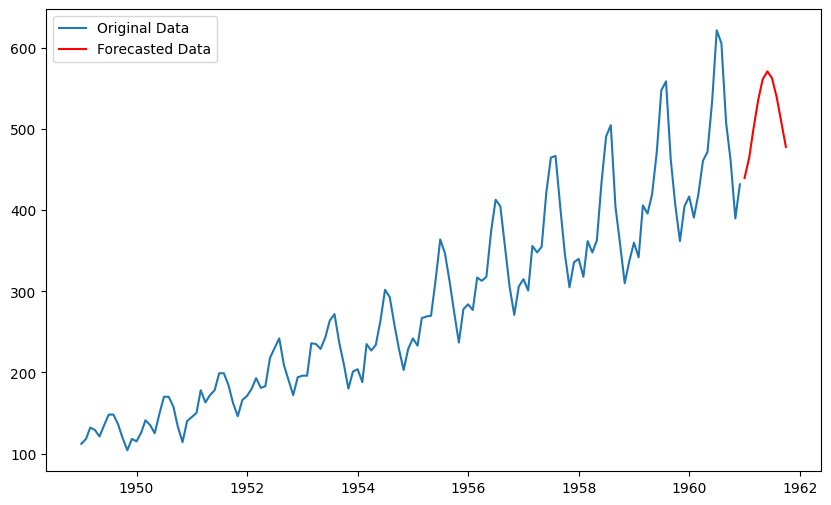

In [25]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from pandas.plotting import autocorrelation_plot
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
# data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# # Plot the dataset
# data.plot()
# plt.show()

# # Checking stationarity by taking the first difference
# data_diff = data.diff().dropna()
# data_diff.plot()
# plt.show()

# # Plot ACF and PACF to identify p and q
# plot_acf(data_diff)
# plt.show()

# plot_pacf(data_diff)
# plt.show()

# # Define the ARIMA model (p=2, d=1, q=2 based on ACF and PACF)
# model = ARIMA(data, order=(2, 1, 2))
# model_fit = model.fit()

# # Summary of the model
# print(model_fit.summary())

# # Forecast the next 10 periods
# forecast = model_fit.forecast(steps=10)
# print(forecast)

# # Plot the forecasted values along with the historical data
# plt.figure(figsize=(10,6))
# plt.plot(data, label='Original Data')
# plt.plot(forecast, label='Forecasted Data', color='red')
# plt.legend()
# plt.show()


# SARIMA

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


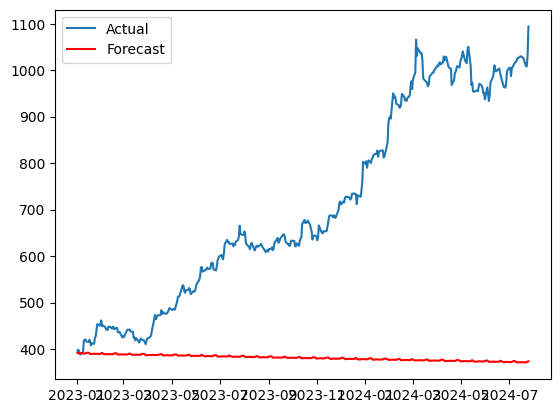

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model on differenced training data
model = SARIMAX(train['High'], order=(1,1,2) , seasonal_order=(1,1,1,12) ) #(p, d, q)
model_fit = model.fit()

# Forecast on the test data
forecast = model_fit.forecast(steps=len(test))

# Evaluate and plot the forecast
plt.plot(test.index, test['High'], label='Actual')
plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.legend()
plt.show()


# Prophet Model

In [148]:
# !pip install prophet


df = pd.DataFrame({'ds' : data.index , 'y' : data.High} )



In [152]:
df.tail()

,ds,y
Date,,
2024-07-19,2024-07-19,1024.000000
2024-07-22,2024-07-22,1008.000000
2024-07-23,2024-07-23,1008.650024
2024-07-24,2024-07-24,1034.250000
2024-07-25,2024-07-25,1094.000000


In [155]:
df.reset_index(drop = True , inplace = True)

In [156]:
from prophet import Prophet
fb = Prophet()
model = fb.fit(df)


11:23:03 - cmdstanpy - INFO - Chain [1] start processing
11:23:04 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
feature = model.make_future_dataframe(periods=383, freq= 'B' )

predict = model.predict(feature)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,573.517466,514.846040,628.203266,573.517466,573.517466,-3.766772,-3.766772,-3.766772,4.943379,4.943379,4.943379,-8.710151,-8.710151,-8.710151,0.0,0.0,0.0,569.750694
1,2015-01-02,572.743974,509.513268,629.989349,572.743974,572.743974,-3.432493,-3.432493,-3.432493,4.649010,4.649010,4.649010,-8.081503,-8.081503,-8.081503,0.0,0.0,0.0,569.311481
2,2015-01-05,570.423497,505.945722,629.636863,570.423497,570.423497,-1.224078,-1.224078,-1.224078,4.421486,4.421486,4.421486,-5.645564,-5.645564,-5.645564,0.0,0.0,0.0,569.199420
3,2015-01-06,569.650005,516.639534,628.748382,569.650005,569.650005,1.460972,1.460972,1.460972,6.112235,6.112235,6.112235,-4.651263,-4.651263,-4.651263,0.0,0.0,0.0,571.110977
4,2015-01-07,568.876513,507.908123,622.629570,568.876513,568.876513,0.004387,0.004387,0.004387,3.574098,3.574098,3.574098,-3.569711,-3.569711,-3.569711,0.0,0.0,0.0,568.880900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,2026-01-07,1478.656339,1222.696322,1749.398782,1228.592790,1747.107487,0.287907,0.287907,0.287907,3.574098,3.574098,3.574098,-3.286191,-3.286191,-3.286191,0.0,0.0,0.0,1478.944246
2738,2026-01-08,1479.582392,1222.288493,1755.754154,1228.330615,1749.175840,2.841214,2.841214,2.841214,4.943379,4.943379,4.943379,-2.102165,-2.102165,-2.102165,0.0,0.0,0.0,1482.423606
2739,2026-01-09,1480.508445,1221.793122,1762.535379,1228.028977,1751.168336,3.805721,3.805721,3.805721,4.649010,4.649010,4.649010,-0.843290,-0.843290,-0.843290,0.0,0.0,0.0,1484.314165
2740,2026-01-12,1483.286602,1234.857985,1771.260518,1229.839199,1755.012936,7.716989,7.716989,7.716989,4.421486,4.421486,4.421486,3.295502,3.295502,3.295502,0.0,0.0,0.0,1491.003591


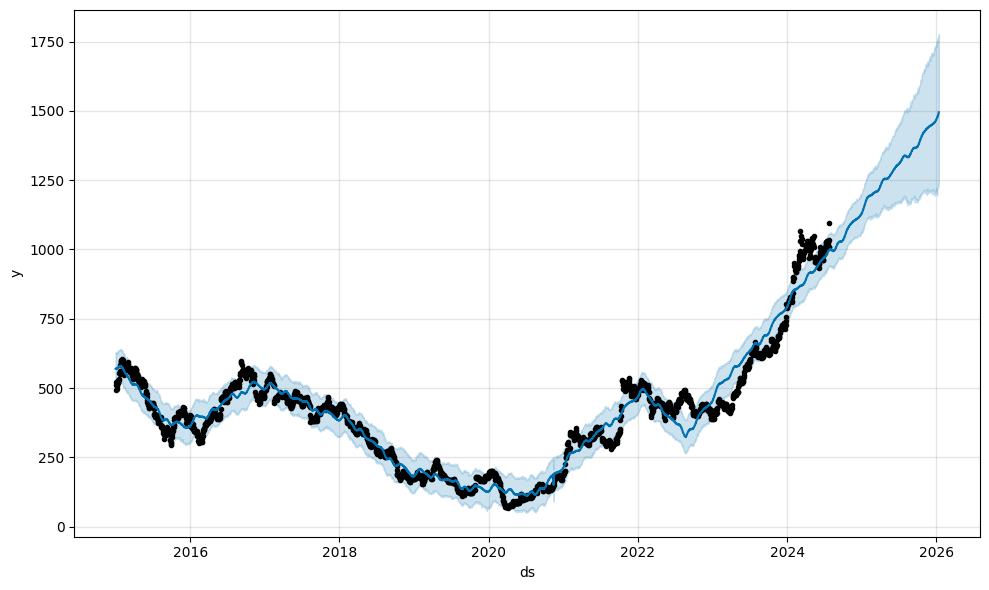

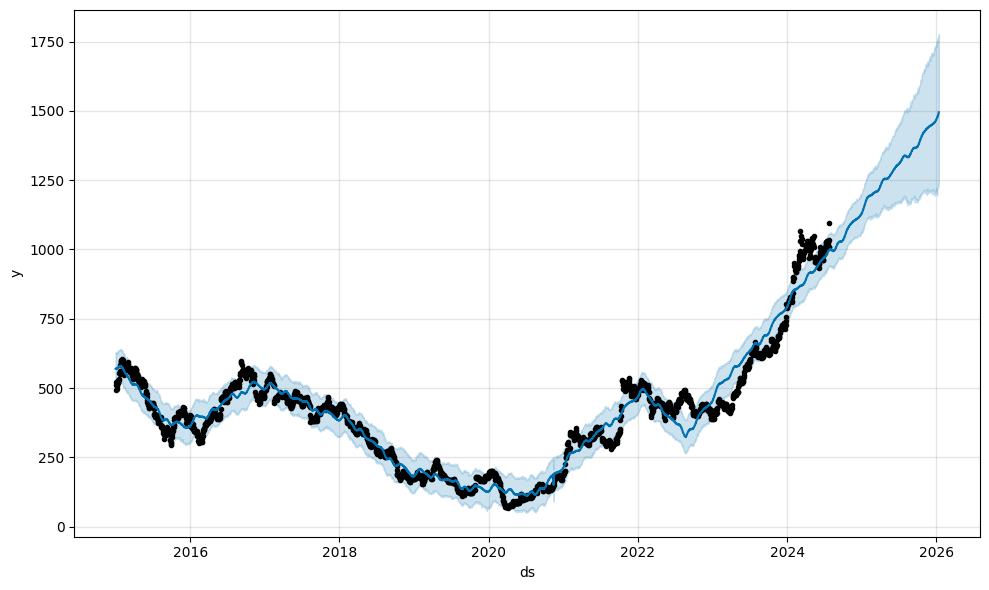

In [158]:
model.plot(predict)

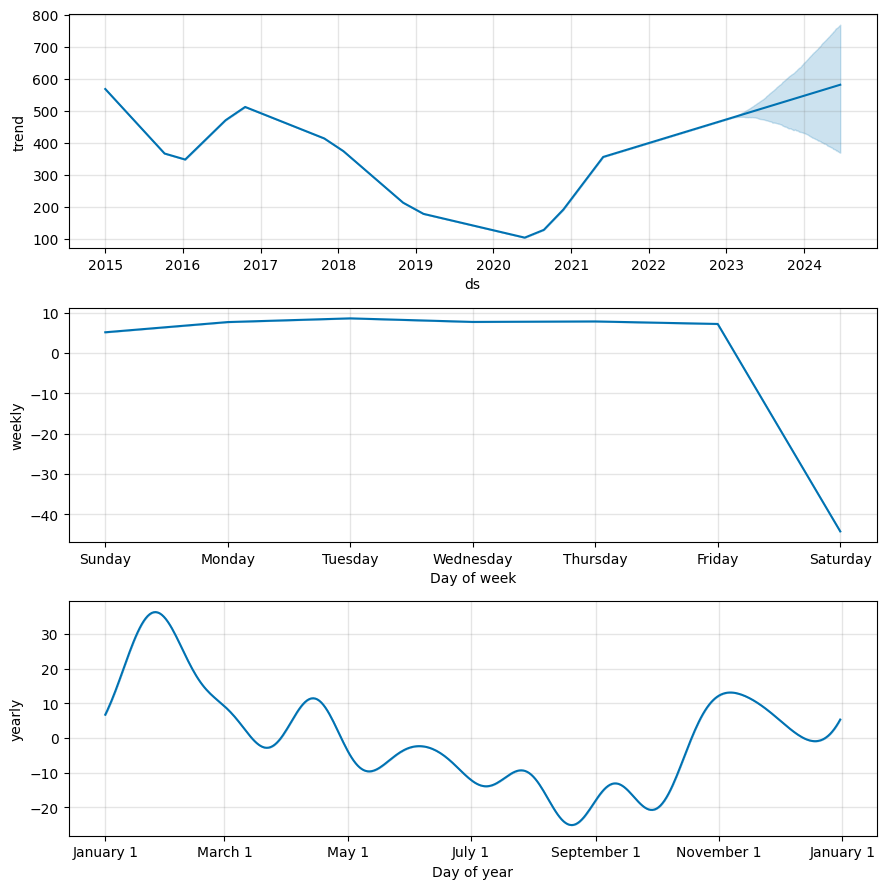

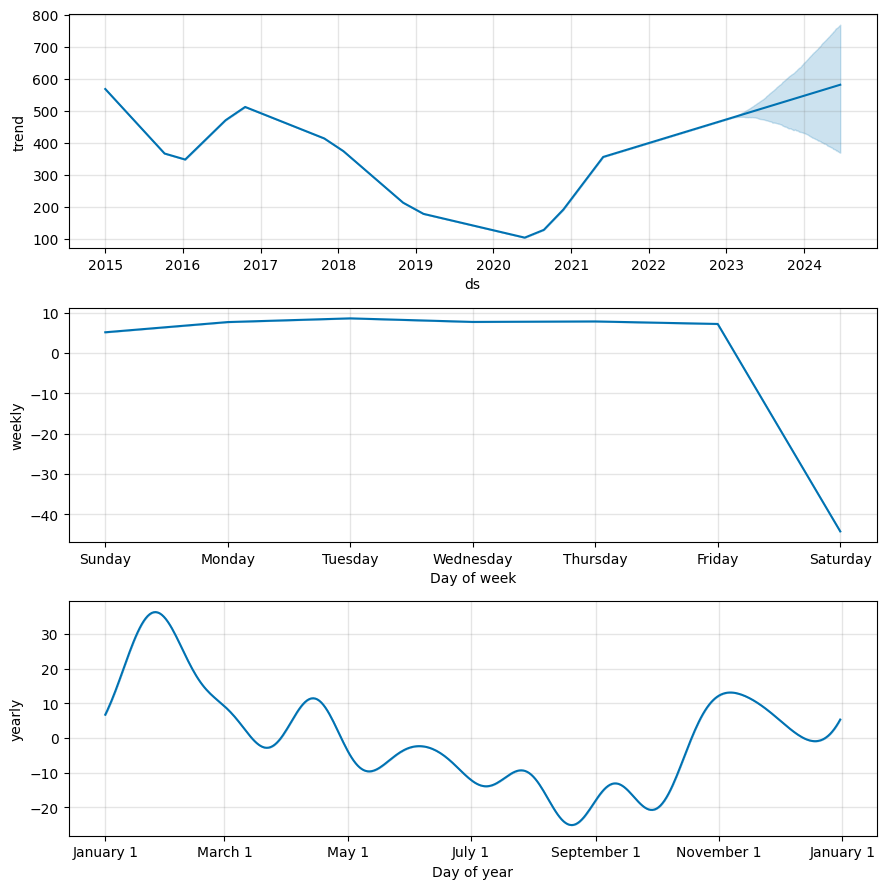

In [108]:
# Plot the forecast components (trend, seasonality)
model.plot_components(predict)


In [132]:
test_future = pd.DataFrame( { 'ds' : test.index })
test_future.head()

,ds
0,2023-01-02
1,2023-01-03
2,2023-01-04
3,2023-01-05
4,2023-01-06


In [135]:
predict1 = model.predict(test_future)

In [136]:
predict1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-02,472.577554,439.239761,536.561880,472.577554,472.577554,15.020171,15.020171,15.020171,7.681674,7.681674,7.681674,7.338497,7.338497,7.338497,0.0,0.0,0.0,487.597725
1,2023-01-03,472.779950,441.776654,537.285378,472.779950,472.779950,17.196769,17.196769,17.196769,8.598967,8.598967,8.598967,8.597801,8.597801,8.597801,0.0,0.0,0.0,489.976719
2,2023-01-04,472.982346,445.808786,536.387200,472.982346,472.982346,17.652403,17.652403,17.652403,7.716748,7.716748,7.716748,9.935655,9.935655,9.935655,0.0,0.0,0.0,490.634749
3,2023-01-05,473.184743,444.937838,539.050104,473.184743,473.184743,19.182985,19.182985,19.182985,7.837785,7.837785,7.837785,11.345199,11.345199,11.345199,0.0,0.0,0.0,492.367727
4,2023-01-06,473.387139,442.815787,540.980341,473.387139,473.387139,20.030828,20.030828,20.030828,7.212530,7.212530,7.212530,12.818298,12.818298,12.818298,0.0,0.0,0.0,493.417967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2024-07-19,586.729043,363.105233,832.510949,371.404271,826.843126,-3.722616,-3.722616,-3.722616,7.212530,7.212530,7.212530,-10.935146,-10.935146,-10.935146,0.0,0.0,0.0,583.006427
379,2024-07-22,587.336232,367.033247,829.418179,371.271979,828.339163,-2.196815,-2.196815,-2.196815,7.681674,7.681674,7.681674,-9.878490,-9.878490,-9.878490,0.0,0.0,0.0,585.139416
380,2024-07-23,587.538628,373.156505,839.643797,369.862550,829.430408,-1.023924,-1.023924,-1.023924,8.598967,8.598967,8.598967,-9.622892,-9.622892,-9.622892,0.0,0.0,0.0,586.514704
381,2024-07-24,587.741024,367.834584,844.293882,368.166444,830.521652,-1.718824,-1.718824,-1.718824,7.716748,7.716748,7.716748,-9.435572,-9.435572,-9.435572,0.0,0.0,0.0,586.022200


In [137]:
test.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-11,1008.000000,1025.500000,1007.049988,1020.799988,1020.799988,11983571.0
2024-07-12,1023.849976,1025.900024,1015.000000,1016.750000,1016.750000,7339644.0
2024-07-15,1021.349976,1029.800049,1017.299988,1024.449951,1024.449951,5847297.0
2024-07-16,1025.500000,1029.599976,1019.200012,1021.150024,1021.150024,4824555.0
2024-07-18,1022.950012,1027.000000,1008.000000,1024.550049,1024.550049,8010324.0
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0
2024-07-24,997.799988,1034.250000,995.150024,1027.699951,1027.699951,11469098.0


In [138]:
predict1.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
373,2024-07-11,585.109873,369.852879,821.421755,373.418963,820.779715,-5.837070,-5.837070,-5.837070,7.837785,7.837785,7.837785,-13.674855,-13.674855,-13.674855,0.0,0.0,0.0,579.272803
374,2024-07-12,585.312269,366.068202,816.405811,372.895988,821.870959,-6.255825,-6.255825,-6.255825,7.212530,7.212530,7.212530,-13.468355,-13.468355,-13.468355,0.0,0.0,0.0,579.056444
375,2024-07-15,585.919458,371.875390,827.310155,372.777806,823.366996,-4.857888,-4.857888,-4.857888,7.681674,7.681674,7.681674,-12.539562,-12.539562,-12.539562,0.0,0.0,0.0,581.061570
376,2024-07-16,586.121854,376.285942,826.318790,372.263389,824.442677,-3.556714,-3.556714,-3.556714,8.598967,8.598967,8.598967,-12.155681,-12.155681,-12.155681,0.0,0.0,0.0,582.565141
377,2024-07-18,586.526647,362.967441,828.567594,371.959926,825.661591,-3.503346,-3.503346,-3.503346,7.837785,7.837785,7.837785,-11.341132,-11.341132,-11.341132,0.0,0.0,0.0,583.023301
378,2024-07-19,586.729043,363.105233,832.510949,371.404271,826.843126,-3.722616,-3.722616,-3.722616,7.212530,7.212530,7.212530,-10.935146,-10.935146,-10.935146,0.0,0.0,0.0,583.006427
379,2024-07-22,587.336232,367.033247,829.418179,371.271979,828.339163,-2.196815,-2.196815,-2.196815,7.681674,7.681674,7.681674,-9.878490,-9.878490,-9.878490,0.0,0.0,0.0,585.139416
380,2024-07-23,587.538628,373.156505,839.643797,369.862550,829.430408,-1.023924,-1.023924,-1.023924,8.598967,8.598967,8.598967,-9.622892,-9.622892,-9.622892,0.0,0.0,0.0,586.514704
381,2024-07-24,587.741024,367.834584,844.293882,368.166444,830.521652,-1.718824,-1.718824,-1.718824,7.716748,7.716748,7.716748,-9.435572,-9.435572,-9.435572,0.0,0.0,0.0,586.022200
382,2024-07-25,587.943421,370.718037,828.844157,366.475105,831.585148,-1.489207,-1.489207,-1.489207,7.837785,7.837785,7.837785,-9.326992,-9.326992,-9.326992,0.0,0.0,0.0,586.454214


In [140]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test['High'] , predict1['yhat'])

197.22361415876932

In [159]:
model.predict(pd.DataFrame({'ds' : ['2024-09-17']}))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-09-17,1036.929253,970.702682,1093.072623,1036.929253,1036.929253,-7.135021,-7.135021,-7.135021,6.112235,6.112235,6.112235,-13.247256,-13.247256,-13.247256,0.0,0.0,0.0,1029.794231


In [145]:
da

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [147]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
...,...,...,...,...,...,...
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0
